In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle as pkl

In [2]:
raw_data = loadarff('rf1.arff')
df = pd.DataFrame(raw_data[0])
df.head()

,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,NASI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,288.0,3.41,276.0,194.0,63.8,8.78,166.0,59.5,NaN,NaN,...,NaN,NaN,269.0,3.33,257.0,186.0,61.2,8.07,157.0,55.1
1,287.0,3.40,275.0,194.0,64.1,8.81,165.0,59.4,NaN,NaN,...,NaN,NaN,269.0,3.32,257.0,185.0,61.1,8.04,157.0,55.2
2,288.0,3.39,274.0,193.0,63.4,8.88,165.0,59.4,NaN,NaN,...,NaN,NaN,268.0,3.32,257.0,186.0,61.3,8.14,156.0,55.2
3,287.0,3.39,273.0,193.0,64.0,8.70,164.0,57.9,NaN,NaN,...,NaN,NaN,268.0,3.33,257.0,185.0,61.2,8.21,156.0,55.9
4,287.0,3.34,273.0,193.0,64.0,8.78,165.0,57.9,NaN,NaN,...,NaN,NaN,266.0,3.31,257.0,185.0,61.4,8.04,156.0,55.9


In [3]:
df = df.dropna()

In [4]:
labels = df.columns[-8:]
feats = df.columns[:-8]
X, Y = df[feats], df[labels]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [7]:
X_train.shape, X_test.shape

((6303, 64), (2702, 64))

In [6]:
trainX = X_train.to_numpy(dtype=np.float32)
trainLabel = Y_train.to_numpy(dtype=np.float32)
testX = X_test.to_numpy(dtype=np.float32)
testLabel = Y_test.to_numpy(dtype=np.float32)

In [7]:
pkl.dump((trainX, trainLabel, testX, testLabel), open('rf1.pkl', "wb"))

In [27]:
pref = (np.random.rand(6, 4)-0.5)**2
pref /= pref.sum(axis=1, keepdims=True)

In [28]:
pref

array([[5.97305245e-02, 6.66555745e-01, 4.55224509e-02, 2.28191279e-01],
       [3.10777963e-01, 5.84466354e-01, 5.86035507e-03, 9.88953281e-02],
       [5.01405726e-01, 1.98147585e-01, 8.04034495e-02, 2.20043239e-01],
       [5.52641366e-01, 2.17491935e-01, 1.66837579e-01, 6.30291206e-02],
       [1.28660311e-01, 4.17209039e-03, 6.20847378e-01, 2.46320220e-01],
       [1.47869625e-01, 7.78440172e-01, 1.21258751e-05, 7.36780773e-02]])

In [29]:
import matplotlib.pyplot as plt

(array([2858., 2536., 2026., 1256.,  764.,  321.,  151.,   61.,   20.,
           7.]),
 array([1.09935461e-05, 3.76729845e-01, 7.53448697e-01, 1.13016755e+00,
        1.50688640e+00, 1.88360525e+00, 2.26032411e+00, 2.63704296e+00,
        3.01376181e+00, 3.39048066e+00, 3.76719951e+00]),
 <a list of 10 Patch objects>)

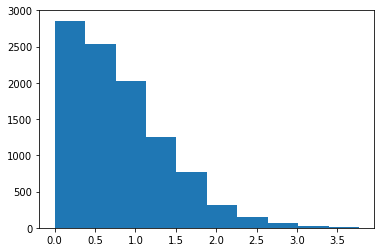

In [32]:
plt.hist(np.abs(np.random.randn(10000)))

In [36]:
df = pd.DataFrame(np.random.rand(5,6))
df

,0,1,2,3,4,5
0,0.765244,0.973717,0.982714,0.943675,0.809965,0.139237
1,0.935450,0.068568,0.744836,0.631150,0.307442,0.425777
2,0.539329,0.857137,0.705273,0.438185,0.691232,0.518987
3,0.038729,0.647180,0.544887,0.787495,0.351601,0.858775
4,0.615912,0.025574,0.858211,0.893673,0.597804,0.809771


In [45]:
low = .05
high = .95
df.quantile([low, high])

,0,1,2,3,4,5
0.05,0.138849,0.034173,0.576964,0.476778,0.316274,0.196545
0.95,0.901409,0.950401,0.957813,0.933675,0.786219,0.848974
